In [26]:
import tensorflow
import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Conv2D, BatchNormalization, Layer, Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.datasets import mnist
from tensorflow.image import resize

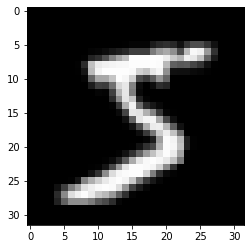

In [44]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.stack((x_train,) * 3, axis=-1)
x_test = np.stack((x_test,) * 3, axis=-1)

x_train = resize(x_train, (32, 32))
x_test = resize(x_test, (32, 32))

x_train = x_train/255.0
x_test = x_test/255.0

In [30]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in vgg_model.layers:
    layer.trainable=False

In [13]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [53]:
custom_classifier = Sequential()
custom_classifier.add(Flatten())
custom_classifier.add(Dense(128, activation="relu"))
custom_classifier.add(Dropout(0.4))
custom_classifier.add(Dense(64, activation='relu'))
custom_classifier.add(Dropout(0.4))
custom_classifier.add(Dense(10, activation='softmax'))

In [54]:
model = Sequential([vgg_model, custom_classifier])

In [55]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 sequential_5 (Sequential)   (None, 10)                74570     
                                                                 
Total params: 14,789,258
Trainable params: 74,570
Non-trainable params: 14,714,688
_________________________________________________________________


In [56]:
model.compile(optimizer='adam', loss=sparse_categorical_crossentropy ,metrics=['accuracy'])

In [57]:
model.fit(x_train, y_train, epochs=5, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/5
235/235 [==============================] - 10s 39ms/step - loss: 1.0538 - accuracy: 0.6427 - val_loss: 0.3401 - val_accuracy: 0.8965
Epoch 2/5
235/235 [==============================] - 9s 38ms/step - loss: 0.4135 - accuracy: 0.8745 - val_loss: 0.1870 - val_accuracy: 0.9429
Epoch 3/5
235/235 [==============================] - 9s 38ms/step - loss: 0.2981 - accuracy: 0.9105 - val_loss: 0.1435 - val_accuracy: 0.9541
Epoch 4/5
235/235 [==============================] - 9s 38ms/step - loss: 0.2443 - accuracy: 0.9280 - val_loss: 0.1298 - val_accuracy: 0.9574
Epoch 5/5
235/235 [==============================] - 9s 39ms/step - loss: 0.2179 - accuracy: 0.9357 - val_loss: 0.1158 - val_accuracy: 0.9622


In [58]:
for layer in vgg_model.layers[:-4]:
 layer.trainable = True

In [59]:
model.compile(optimizer='adam', loss=sparse_categorical_crossentropy ,metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=256, validation_data=(x_test, y_test))

Epoch 1/5
235/235 [==============================] - 26s 97ms/step - loss: 1.9321 - accuracy: 0.4023 - val_loss: 0.3168 - val_accuracy: 0.9118
Epoch 2/5
235/235 [==============================] - 22s 94ms/step - loss: 0.1795 - accuracy: 0.9566 - val_loss: 0.0614 - val_accuracy: 0.9842
Epoch 3/5
235/235 [==============================] - 22s 94ms/step - loss: 0.0908 - accuracy: 0.9793 - val_loss: 0.0485 - val_accuracy: 0.9866
Epoch 4/5
235/235 [==============================] - 22s 94ms/step - loss: 0.0640 - accuracy: 0.9856 - val_loss: 0.0390 - val_accuracy: 0.9906
Epoch 5/5
235/235 [==============================] - 22s 94ms/step - loss: 0.0564 - accuracy: 0.9873 - val_loss: 0.0472 - val_accuracy: 0.9888


Here we can see using weights of VGG16 model we are able to train a model with high accuracy only in few epochs whereas we are using 20 to 30 epochs in mnist data classification here we are using only 5 epochs also after fine tuning the model by unfreezing the lower 4 layers we can increase the accuracy of model from 96% to 99% in 5 epochs